# 第11讲 可视化(Visualization)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 11.1 plot

- 语法

```python
>>>  plt.plot()
```

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))
ts

2000-01-01    0.208457
2000-01-02    0.909711
2000-01-03    1.364188
2000-01-04   -0.079760
2000-01-05   -1.146862
                ...   
2002-09-22    0.209338
2002-09-23    0.357431
2002-09-24    1.849566
2002-09-25    0.101201
2002-09-26   -0.059017
Freq: D, Length: 1000, dtype: float64

In [3]:
ts = ts.cumsum()
ts

2000-01-01     0.208457
2000-01-02     1.118168
2000-01-03     2.482356
2000-01-04     2.402595
2000-01-05     1.255733
                ...    
2002-09-22    64.464244
2002-09-23    64.821675
2002-09-24    66.671241
2002-09-25    66.772442
2002-09-26    66.713426
Freq: D, Length: 1000, dtype: float64

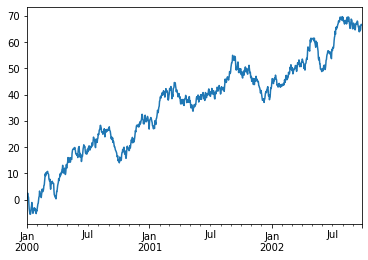

In [4]:
ts.plot()

if the index consists of dates, it calls gcf().autofmt_xdate() to try to format the x-axis nicely as per above.   
On DataFrame, plot() is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

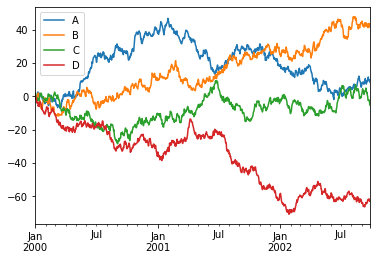

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()

You can plot one column versus another using the x and y keywords in plot():

In [49]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3

,B,C
0,-0.791321,0.784657
1,-3.240779,1.101169
2,-3.269640,-0.403616
3,-2.479760,-1.500608
4,-3.296082,-1.605488
...,...,...
995,-26.811960,39.932162
996,-27.484971,39.988309
997,-27.137120,39.876758
998,-28.369233,40.157135


In [51]:
df3['A'] = pd.Series(list(range(len(df))))
df3

,B,C,A
0,-0.791321,0.784657,0
1,-3.240779,1.101169,1
2,-3.269640,-0.403616,2
3,-2.479760,-1.500608,3
4,-3.296082,-1.605488,4
...,...,...,...
995,-26.811960,39.932162,995
996,-27.484971,39.988309,996
997,-27.137120,39.876758,997
998,-28.369233,40.157135,998


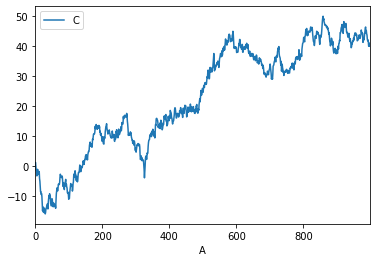

In [53]:
df3.plot(x='A', y='C')

In [56]:
df

,a,b,c,d
0,1.245806,-0.255064,0.159142,0.864619
1,-2.116822,-0.559578,-2.514182,-0.904383
2,1.703382,0.466248,2.343220,-0.533058
3,1.662772,0.293925,-0.497791,-0.439400
4,-2.497532,-2.286543,-0.271097,1.825050
...,...,...,...,...
995,1.205488,-0.063296,-0.203847,0.640704
996,-0.447613,-1.708968,0.245419,0.307765
997,-0.752992,-1.540731,-0.477368,0.575049
998,0.644475,-1.965179,1.324994,1.307436


## 11.2 其他绘图方法：kind 关键字

- ‘bar’ or ‘barh’ for bar plots  
- ‘hist’ for histogram  
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots • ‘area’ for area plots  
- ‘scatter’ for scatter plots  
- ‘hexbin’ for hexagonal bin plots  
- ‘pie’ for pie plots  
-   


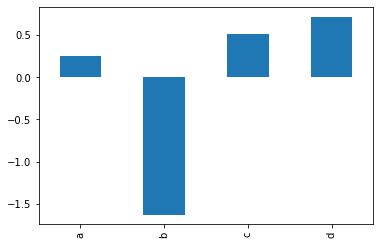

In [54]:
plt.figure();
df.iloc[5].plot(kind='bar');

In [55]:
df.iloc[5]

a    0.247472
b   -1.628158
c    0.511912
d    0.716824
Name: 5, dtype: float64

-  DataFrame.plot.<kind>替代

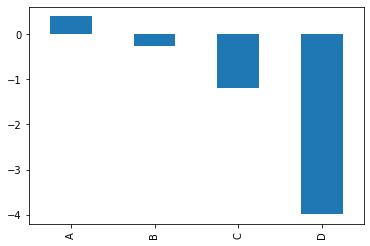

In [9]:
df.iloc[5].plot.bar()

In addition to these kind s, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface.   
Finally, there are several plotting functions in `pandas.plotting` that take a Series or DataFrame as an argument. These include:  
- Scatter Matrix
- Andrews Curves
- Parallel Coordinates
- Lag Plot
- Autocorrelation Plot
- Bootstrap Plot
- RadViz

### 11.2.1 Bar

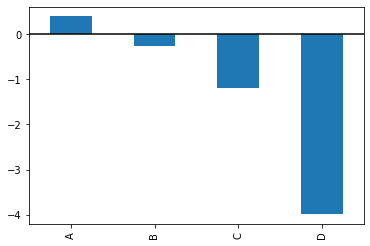

In [10]:
plt.figure();
df.iloc[5].plot.bar(); 
plt.axhline(0, color='k')

In [57]:
df2

,a,b,c,d
0,0.605644,0.251404,0.255693,0.402389
1,0.057957,0.597356,0.479432,0.851218
2,0.547187,0.039114,0.068768,0.586075
3,0.928189,0.795162,0.992816,0.118014
4,0.124920,0.426383,0.793723,0.342109
5,0.061311,0.274786,0.931251,0.267128
6,0.929114,0.777622,0.756821,0.729422
7,0.471861,0.940751,0.971801,0.378788
8,0.913348,0.224759,0.636544,0.588376
9,0.094624,0.725756,0.957304,0.235425


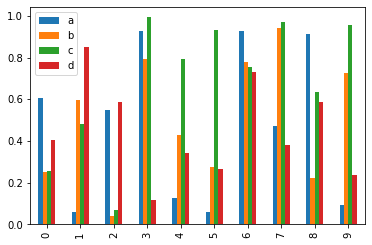

In [11]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

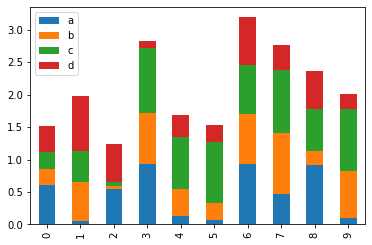

In [12]:
df2.plot.bar(stacked=True)

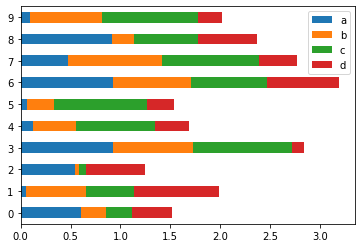

In [13]:
df2.plot.barh(stacked=True);

### 11.2.2 Histograms

In [58]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4

,a,b,c
0,1.128798,0.527639,-0.965056
1,1.658060,-0.186977,-1.332850
2,0.630960,-1.476333,-1.158314
3,1.130119,-0.266455,0.477441
4,0.341284,0.463055,-1.297820
...,...,...,...
995,1.805247,-0.122630,-1.383965
996,0.660270,0.089828,-1.715850
997,0.594117,-0.563097,-0.498715
998,-0.201502,0.229298,-2.489323


<Figure size 432x288 with 0 Axes>

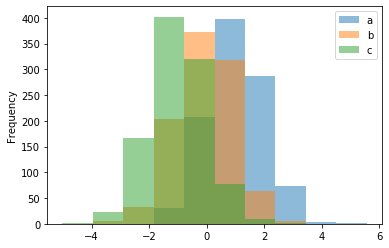

In [15]:
plt.figure();
df4.plot.hist(alpha=0.5)

<Figure size 432x288 with 0 Axes>

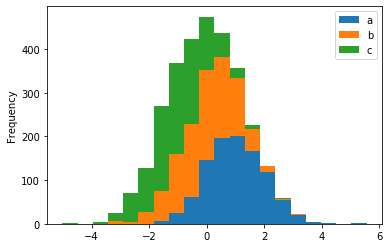

In [16]:
plt.figure();
df4.plot.hist(stacked=True, bins=20)

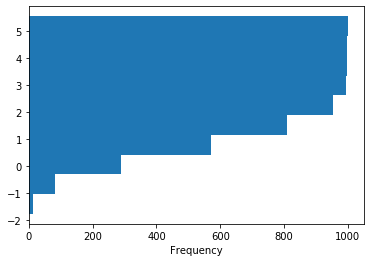

In [17]:
plt.figure();
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

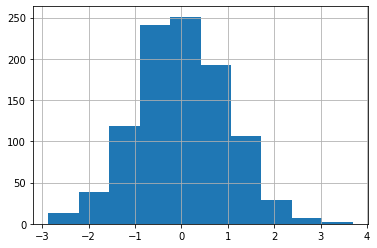

In [18]:
plt.figure();
df['A'].diff().hist()

DataFrame.hist() plots the histograms of the columns on multiple subplots:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012F934F1408>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

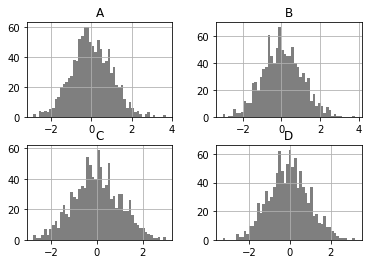

In [19]:
plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012F9365CBC8>,
      dtype=object)

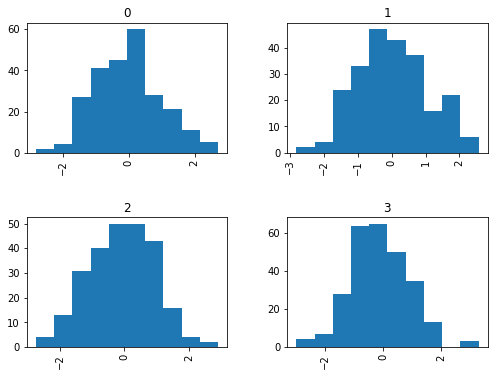

In [20]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000), figsize=(8, 6))  

### 11.2.3 Box Plots

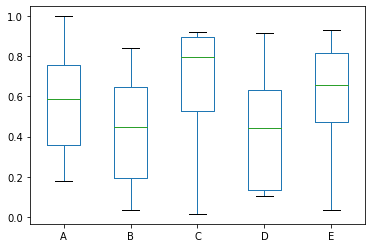

In [21]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box() #箱型图包含一组数据：中位数、上四分位数、下四分位数、内限、外限、异常值

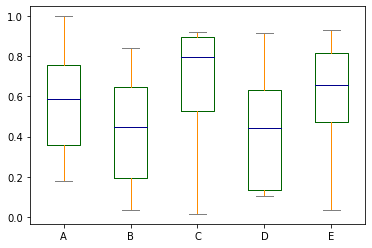

In [22]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+')

### 11.2.4 Area Plot

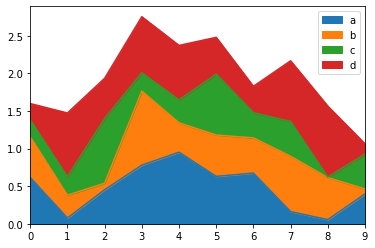

In [23]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area();

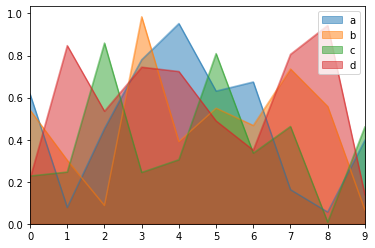

In [24]:
 df.plot.area(stacked=False);

### 11.2.5 Scatter Plot

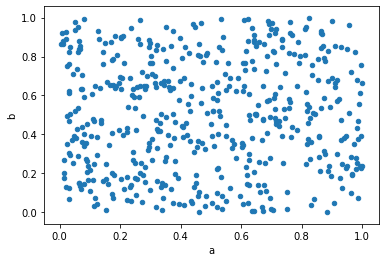

In [25]:
df = pd.DataFrame(np.random.rand(500, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

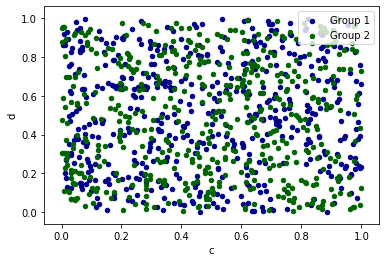

In [26]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

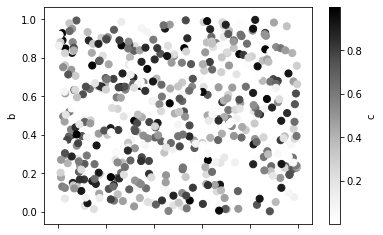

In [27]:
 df.plot.scatter(x='a', y='b', c='c', s=50);

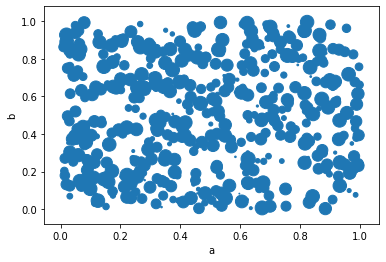

In [28]:
 df.plot.scatter(x='a', y='b', s=df['c']*200);


### 11.2.6 Hexagonal Bin Plot

Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.   
如果您的数据过于密集，无法单独绘制每个点，则Hexbin图可以作为散点图的有用替代方案。

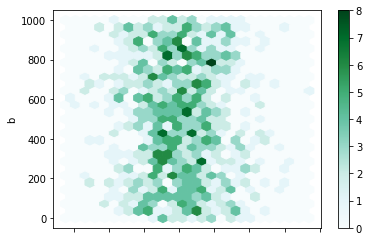

In [29]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x='a', y='b', gridsize=25)

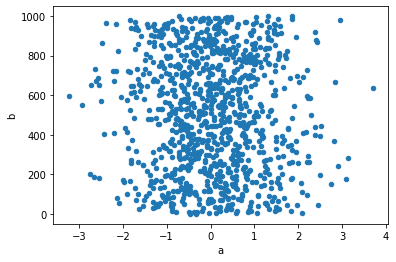

In [30]:
df.plot.scatter(x='a', y='b');

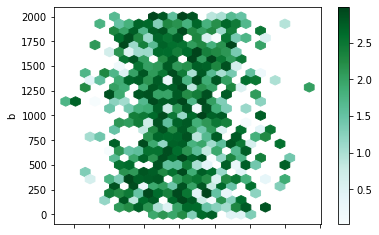

In [31]:
#df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max,gridsize=25)

### 11.2.7 Pie plot

In [32]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series

a    1.307835
b    2.734352
c    0.357995
d    1.971048
Name: series, dtype: float64

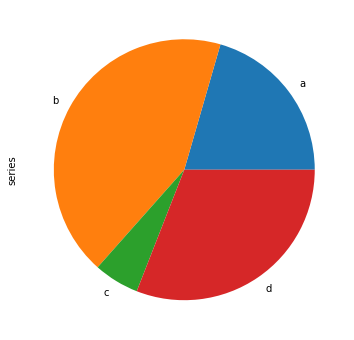

In [33]:
series.plot.pie(figsize=(6, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012F93D45A08>,
      dtype=object)

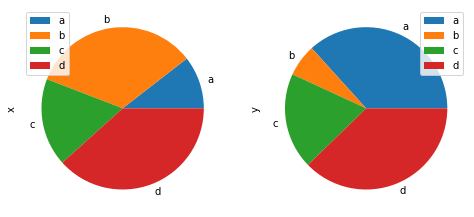

In [34]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4))

## 11.3 Plotting Tools


 ### 11.3.1 Scatter Matrix Plot

In [35]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1.245806,-0.255064,0.159142,0.864619
1,-2.116822,-0.559578,-2.514182,-0.904383
2,1.703382,0.466248,2.343220,-0.533058
3,1.662772,0.293925,-0.497791,-0.439400
4,-2.497532,-2.286543,-0.271097,1.825050
...,...,...,...,...
995,1.205488,-0.063296,-0.203847,0.640704
996,-0.447613,-1.708968,0.245419,0.307765
997,-0.752992,-1.540731,-0.477368,0.575049
998,0.644475,-1.965179,1.324994,1.307436


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012F93DFA508>,
      dtype=object)

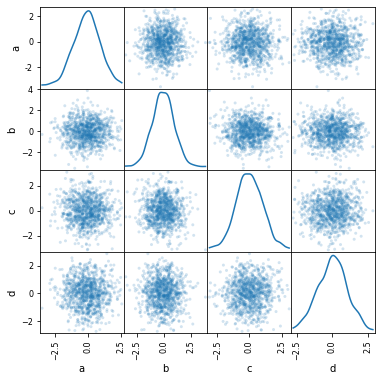

In [36]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

 ### 11.3.2 Density Plot

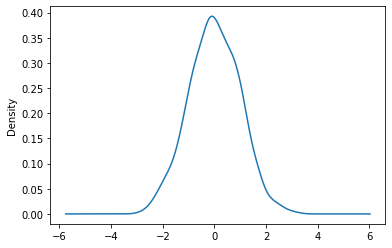

In [37]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()


 ### 11.3.3 Lag Plot
 - Lag plots are used to check if a data set or time series is random

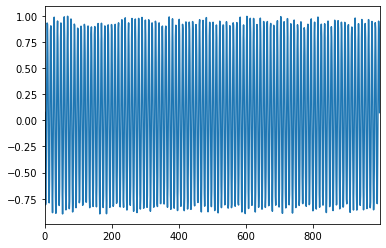

In [38]:
from pandas.plotting import lag_plot
plt.figure()
data = pd.Series(0.1 * np.random.rand(1000) +0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000))
                +0 * np.sin(2*np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
data.plot()

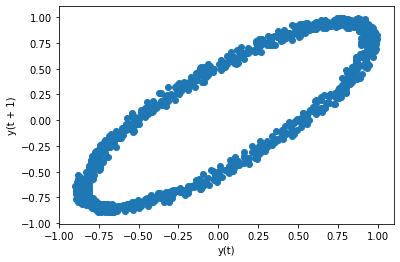

In [39]:
lag_plot(data)

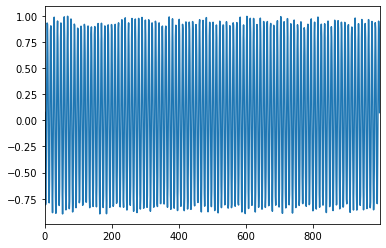

In [40]:
data.plot()

 ### 11.3.4 Autocorrelation Plot

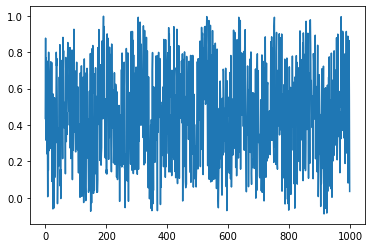

In [41]:
from pandas.plotting import autocorrelation_plot
plt.figure()
data = pd.Series(0.9 * np.random.rand(1000) + 0.1 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
plt.plot(data)

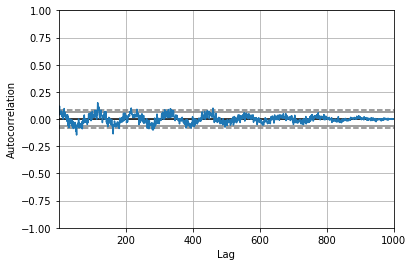

In [42]:
autocorrelation_plot(data)

 ### 11.3.3 RadViz(径向坐标可视化)
 - RadViz is a way of visualizing multi-variate data.
 - 可视化原理是将一系列多维空间的点通过非线性方法映射到二维空间的可视化技术,是基于圆形平行坐标系的设计思想而提出的多维可视化方法
 - 径向坐标可视化是基于弹簧张力最小化算法。它把数据集的特征映射成二维目标空间单位圆中的一个点，点的位置由系在点上的特征决定。把实例投入圆的中心，特征会朝圆中此实例位置（实例对应的归一化数值）“拉”实例。

In [59]:
from pandas.plotting import radviz
data = pd.read_csv('iris.data',names = ['a','b','c','d','Name'])
data

,a,b,c,d,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


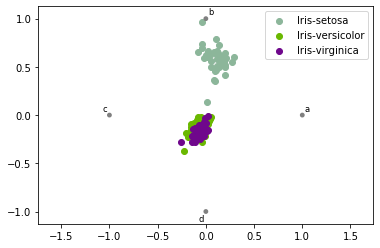

In [60]:
plt.figure()
radviz(data, 'Name')

In [61]:
from pandas.plotting import radviz

test = pd.DataFrame([[1,0.1,'a'],[2,1,'a'],[1,1,'b'],[2,0,'b']],columns={'x','y','c'})

test

,c,y,x
0,1,0.1,a
1,2,1.0,a
2,1,1.0,b
3,2,0.0,b


In [62]:
plt.figure()
radviz(test, 'c')

TypeError: ("unsupported operand type(s) for -: 'str' and 'str'", 'occurred at index x')

<Figure size 432x288 with 0 Axes>